In [1]:
from benchmark import *
%matplotlib inline

/Users/jpaggi/sherlock/combind_code/schrodinger_local.ve/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/jpaggi/sherlock/combind_code/schrodinger_local.ve/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def sweep_helpers(helpers, aggregate, version='stats104', save=None):
    ligs = [0, 1, 5, 10, 15, 20]
    data = get_data(helpers, version)
    combind, glide = [], []
    for lig in ligs:
        if lig == 0:
            g, _ = results(data, helpers, 1.0, 'standard', 'mcss_contact_hbond_sb', 1, aggregate)
            c = g
        else:
            g, c = results(data, helpers, 1.0, 'standard', 'mcss_contact_hbond_sb', lig, aggregate)
        combind += [c]
        glide += [g]

    plt.plot(ligs, combind, color='green', lw=4)
    plt.scatter(ligs, combind, color='green', s=50)
    plt.plot(ligs, glide, color='grey', ls='--', lw=4)
    plt.xticks(ligs)
    plt.xlim(ligs[0], ligs[-1])
    plt.ylim(0.5, 0.75)
    if save:
        plt.savefig('../../pymol/figures/benchmark/sweep-ligands-{}.pdf'.format(save))
    plt.show()
    
def sweep_features(helpers, aggregate, version='stats21', save=None):
    features = ['mcss_contact_hbond_sb',
                'contact_hbond_sb', 'mcss_hbond_sb', 'mcss_contact_sb', 'mcss_contact_hbond', 'mcss',]
    data = get_data(helpers, [version])
    combind, glide = [], []
    for feature in features:
        g, c = results(data, helpers, 1.0, 'standard', feature, 20, aggregate)
        combind += [c]
        glide += [g]

    plt.bar(range(len(combind)+1), glide[:1]+combind, color=['grey', 'green'] + ['lightgreen']*(len(features)-1))
    plt.xticks(range(len(features)+1), ['physics_only']+ features, rotation='vertical')
    plt.ylim(0.5, 0.75)
    if save:
        plt.savefig('../../pymol/figures/benchmark/sweep-features-{}.pdf'.format(save))
    plt.show()

248
248
248
248
248
248


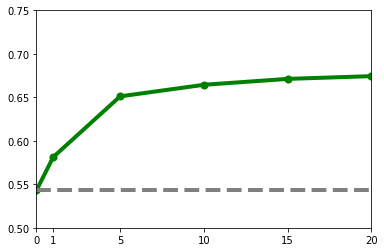

In [8]:
sweep_helpers('best_mcss', 'ligand', save='best_mcss')

248
248
248
248
248
248


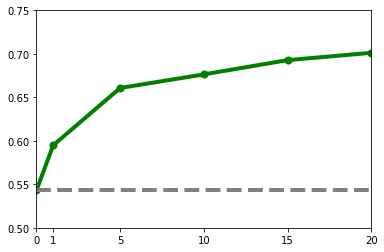

In [9]:
sweep_helpers('best_affinity_diverse', 'ligand', save = 'best_affinity_diverse')

248
248
248
248
248
248


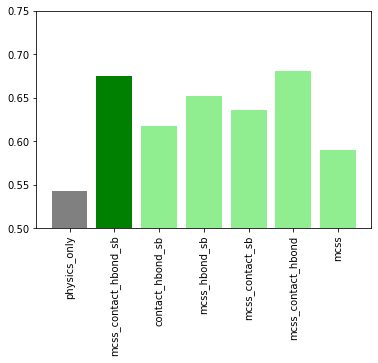

In [10]:
sweep_features('best_mcss', 'ligand', save = 'best_mcss')

248
248
248
248
248
248


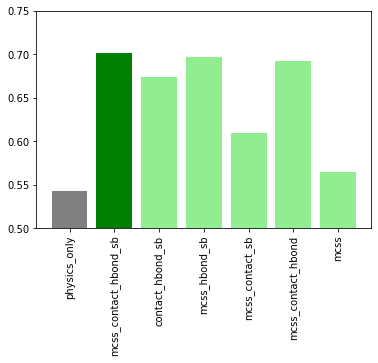

In [11]:
sweep_features('best_affinity_diverse', 'ligand', save = 'best_affinity_diverse')